In [1]:
import numpy as np    
import pandas as pd

import tensorflow as tf                       
                       
import matplotlib.pyplot as plt   
import seaborn as sns            

In [2]:
from tensorflow.keras.datasets.mnist import load_data   

In [3]:
(X_train, y_train) , (X_test, y_test) = load_data() 

In [4]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [5]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

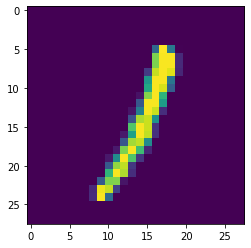

In [8]:
plt.imshow(X_train[99]);

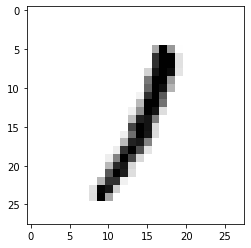

In [9]:
plt.imshow(X_train[99], cmap= plt.cm.binary);

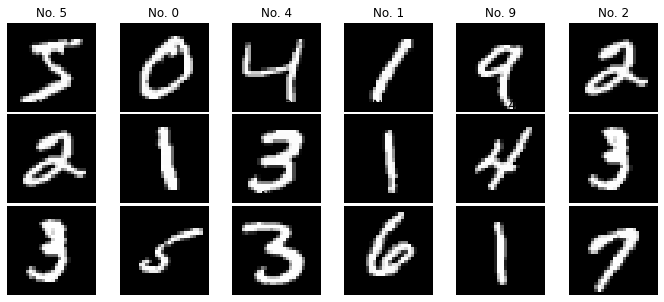

In [10]:
num_rows, num_cols = 3, 6       
f, ax = plt.subplots(3, 6, figsize=(12,5),
                     gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title(f'No. {y_train[image_index]}')
plt.show()
plt.close()

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

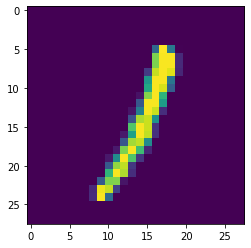

In [12]:
plt.imshow(X_train[99]);

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)
y_test.shape

# Different ways to do labelEncoding and get dummies together. Nice...

(10000, 10)

In [19]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))


opt = Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss',patience = 2)

In [25]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split = 0.1 , callbacks=[early_stop])


Epoch 1/10
1688/1688 [==============================] - 10s 4ms/step - loss: 0.1580 - accuracy: 0.9533 - val_loss: 0.0576 - val_accuracy: 0.9840
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0528 - accuracy: 0.9837 - val_loss: 0.0445 - val_accuracy: 0.9872
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0457 - val_accuracy: 0.9875
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0526 - val_accuracy: 0.9862


In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
model.history.history 

{'loss': [0.1580127328634262,
  0.052806925028562546,
  0.033086683601140976,
  0.021483615040779114],
 'accuracy': [0.9533148407936096,
  0.9836851954460144,
  0.9897407293319702,
  0.9929629564285278],
 'val_loss': [0.05756476894021034,
  0.04453593119978905,
  0.045665111392736435,
  0.05257859453558922],
 'val_accuracy': [0.984000027179718,
  0.9871666431427002,
  0.987500011920929,
  0.9861666560173035]}

In [28]:
history = pd.DataFrame(model.history.history)
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.158013,0.953315,0.057565,0.984000
1,0.052807,0.983685,0.044536,0.987167
2,0.033087,0.989741,0.045665,0.987500
3,0.021484,0.992963,0.052579,0.986167


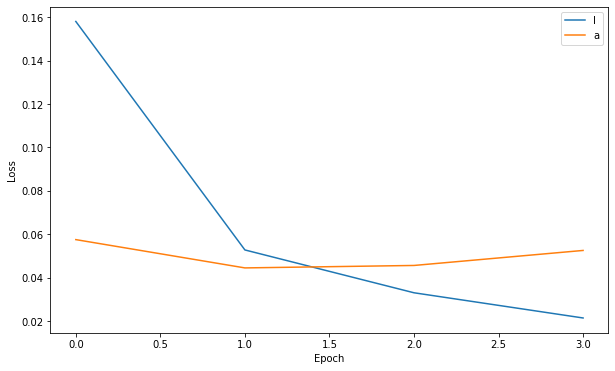

In [29]:
plt.figure(figsize=(10,6))
plt.plot(history.loss)            
plt.plot(history.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels');

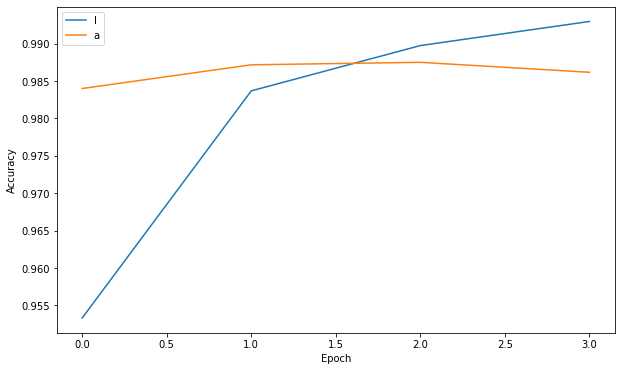

In [30]:
plt.figure(figsize=(10,6))
plt.plot(history.accuracy)       
plt.plot(history.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [31]:
scores = model.evaluate(X_test,y_test,verbose=1)
print(scores)

313/313 [==============================] - 1s 2ms/step - loss: 0.0497 - accuracy: 0.9846
[0.04968343675136566, 0.9846000075340271]


In [32]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.04968343675136566
Test accuracy: 0.9846000075340271


In [33]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
print(y_pred)
print(y_pred.shape)

313/313 [==============================] - 1s 2ms/step
[[2.0753519e-06 5.9761067e-09 8.3262203e-05 ... 9.9990153e-01
  1.0000434e-06 5.9319564e-06]
 [3.0652947e-07 3.0880919e-04 9.9968874e-01 ... 2.8047547e-08
  8.5742089e-09 1.5629103e-08]
 [8.2289276e-05 9.9819523e-01 1.1411264e-04 ... 8.7854656e-05
  3.6987607e-05 6.2143017e-06]
 ...
 [4.7605288e-12 1.6906257e-10 2.2389977e-10 ... 1.9218293e-08
  3.2818991e-06 6.9960574e-06]
 [8.7166789e-09 2.3950497e-10 7.6165567e-12 ... 6.5734573e-10
  2.5408546e-04 1.0095780e-08]
 [7.4360205e-12 1.3788437e-11 1.1366674e-09 ... 3.8692281e-13
  4.8782828e-11 7.1896705e-14]]
(10000, 10)


In [34]:
print(y_test)
print(y_test.shape)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 10)


In [35]:
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test , axis = 1)

In [36]:
y_test[0]

7

In [37]:
y_pred[0]

7

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.96      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.98      0.99      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.96      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [39]:
print(confusion_matrix(y_test, y_pred))

[[ 971    0    1    1    0    0    6    0    0    1]
 [   0 1113   10    1    1    0    4    3    2    1]
 [   0    0 1024    0    1    0    1    5    0    1]
 [   0    0    2 1004    0    2    0    0    1    1]
 [   0    0    0    0  971    0    3    0    0    8]
 [   1    0    1    6    0  874    6    0    3    1]
 [   4    2    0    0    1    1  949    0    1    0]
 [   0    0   13    2    0    0    0 1010    1    2]
 [   5    0   12    3    1    2    3    1  939    8]
 [   0    0    1    2   11    2    0    1    1  991]]


In [40]:
labels = ['0',
'1',
'2',
'3',
'4',
'5',
'6',
'7',
'8',
'9']

In [41]:
X_test.shape

(10000, 28, 28, 1)

In [42]:
X_test = X_test.reshape(X_test.shape[0],28,28)

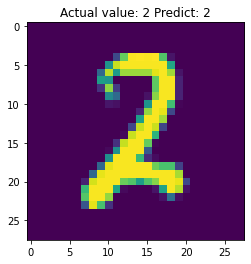

In [43]:
import random

i = random.randint(0, 9999)

plt.imshow(X_test[i])

l1 = labels[y_test[i]]

l2 = labels[y_pred[i]]
plt.title(f"Actual value: {l1} Predict: {l2}" );

In [44]:
# my_number = X_test[5]

In [45]:
# plt.imshow(my_number.reshape(28,28));   

In [46]:
# model.predict(my_number.reshape(1,28,28,1))

In [47]:
# np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

In [48]:
model.save("CNN-1.h5")

In [49]:
# Done